In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [ ]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [ ]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [ ]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [ ]:
df.shape

(271217, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [ ]:
df.isnull().sum()

,0
latitude,0
longitude,0
brightness,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [ ]:
df.value_counts()

,,,,,,,,,,,,,,,count
latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,
34.9734,77.9828,308.4,1.2,1.1,2022-09-08,539,Terra,MODIS,32,6.03,290.6,8.9,D,0,1
34.3824,73.8118,313.2,1.0,1.0,2023-10-13,840,Aqua,MODIS,47,61.03,300.4,6.5,D,0,1
34.3436,74.6062,306.7,1.3,1.1,2023-10-25,849,Aqua,MODIS,54,61.03,295.1,6.4,D,0,1
34.3307,73.8638,306.8,1.8,1.3,2023-12-29,458,Terra,MODIS,63,61.03,287.5,21.6,D,0,1
34.3062,74.7449,313.3,1.0,1.0,2021-12-02,819,Aqua,MODIS,57,6.03,287.5,13.6,D,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.2001,77.6441,308.3,1.3,1.1,2023-02-26,1707,Terra,MODIS,60,61.03,296.2,9.5,N,0,1
8.1903,77.5869,311.2,1.0,1.0,2022-01-24,522,Terra,MODIS,47,6.03,283.2,6.7,D,0,1
8.1614,77.4396,322.5,1.6,1.2,2023-06-29,817,Aqua,MODIS,73,61.03,296.4,22.6,D,2,1


In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


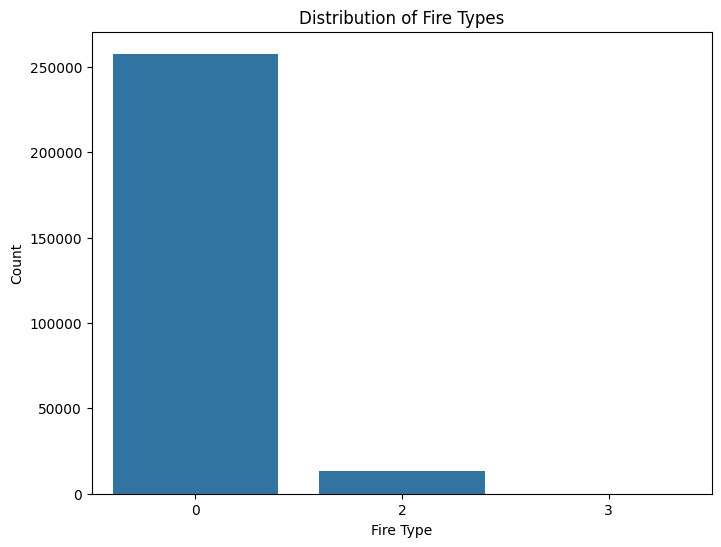

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

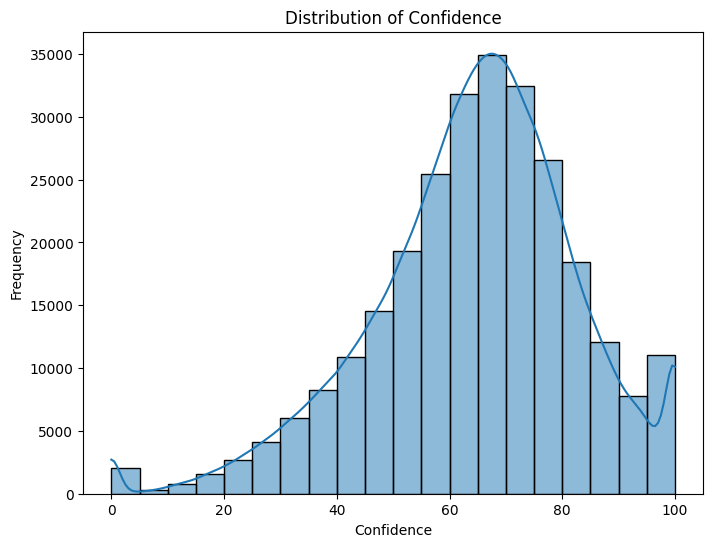

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

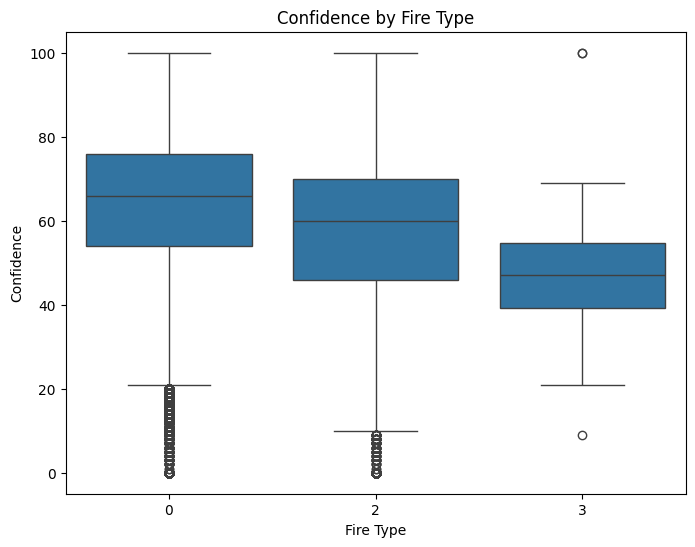

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

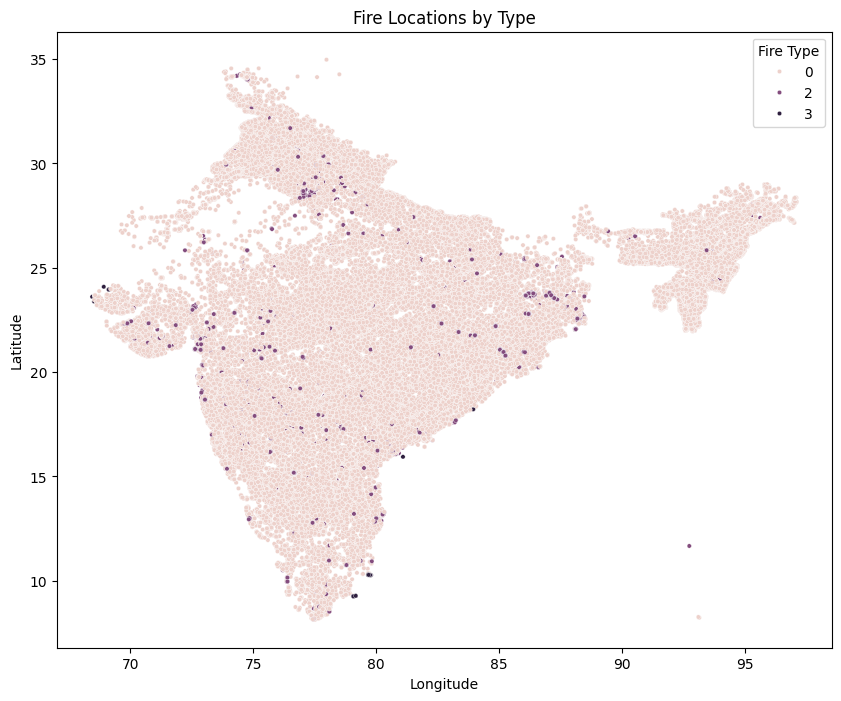

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

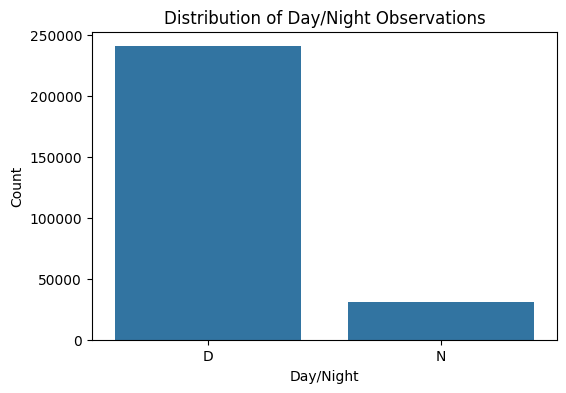

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

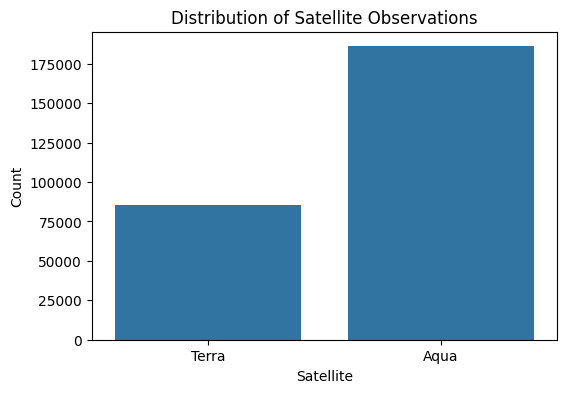

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

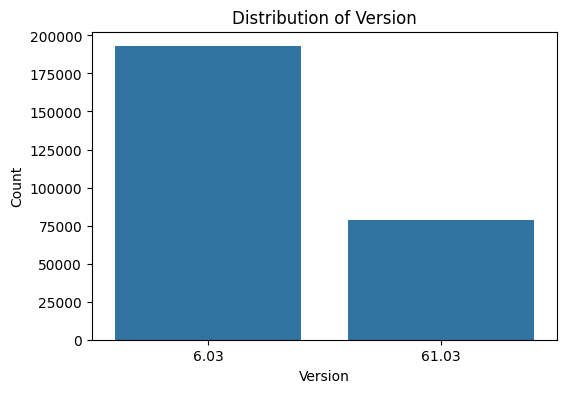

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

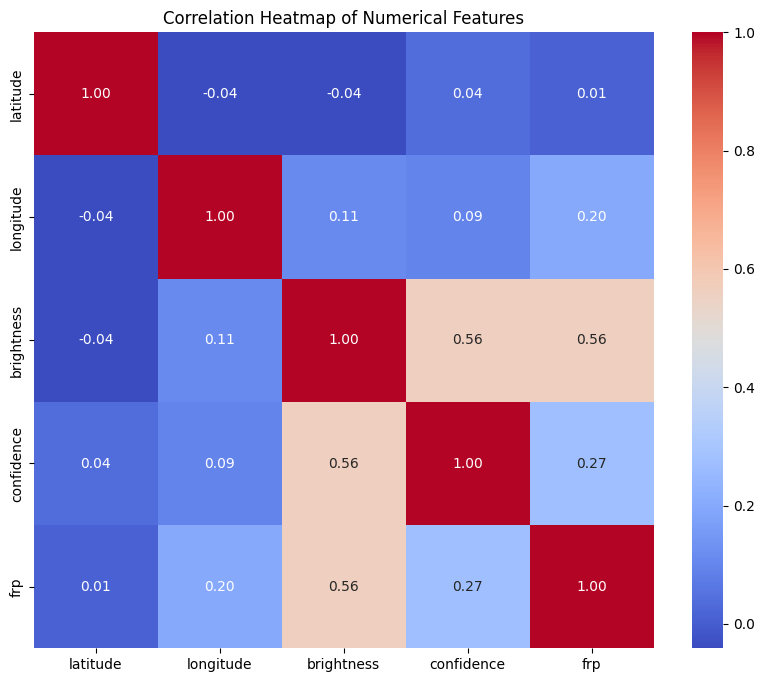

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [ ]:
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

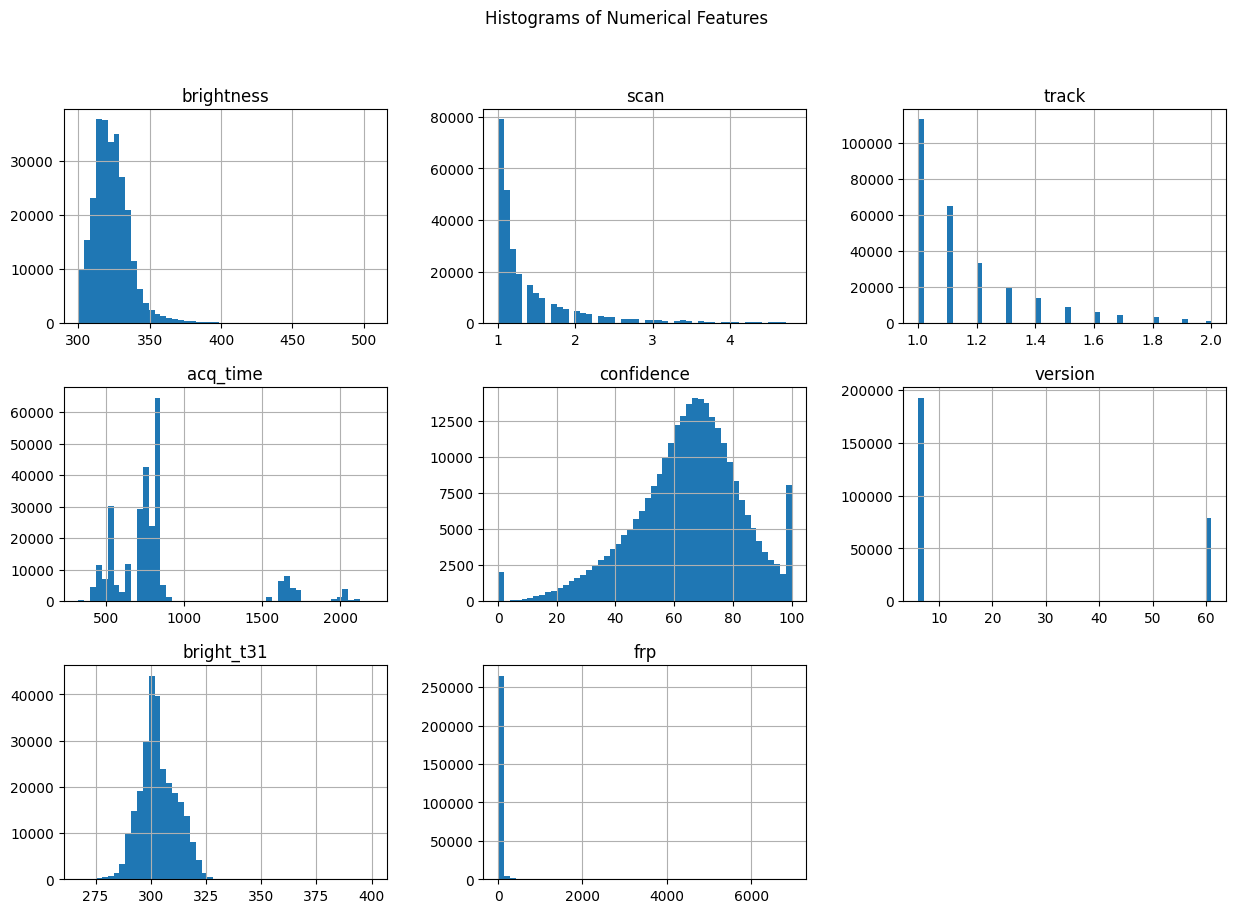

In [ ]:
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Analyzing distribution for: brightness


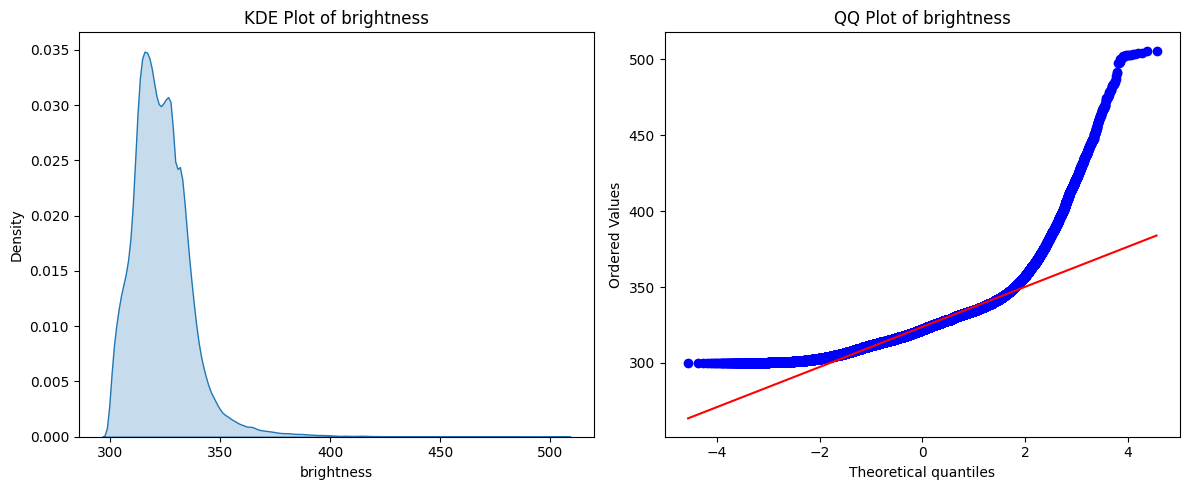

--------------------------------------------------
Analyzing distribution for: confidence


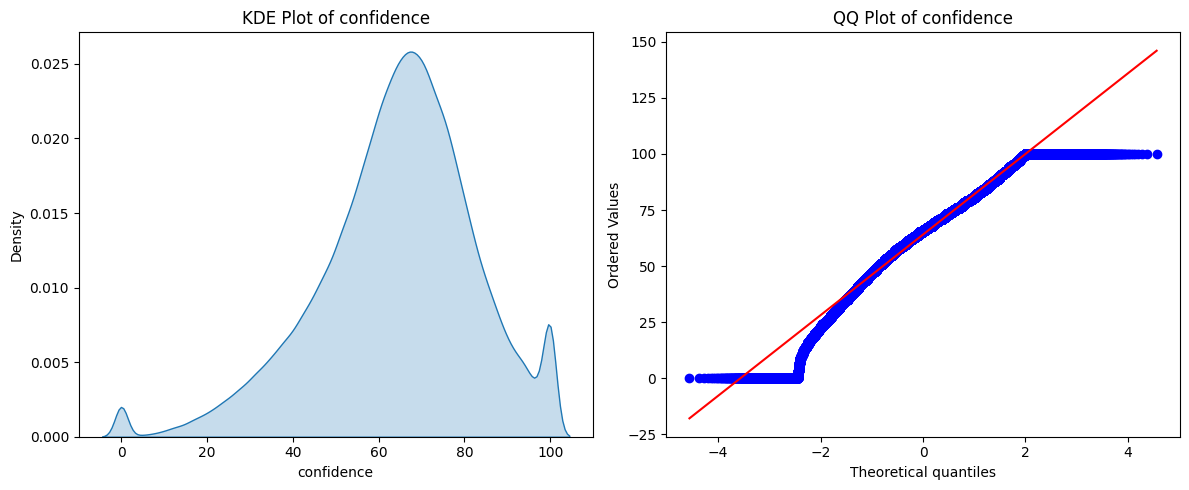

--------------------------------------------------
Analyzing distribution for: frp


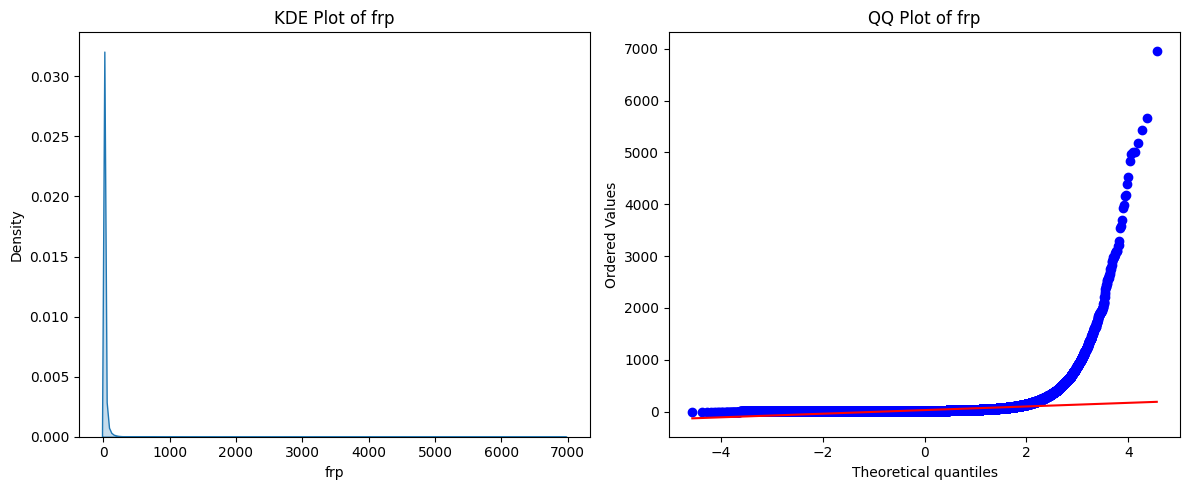

--------------------------------------------------
Analyzing distribution for: bright_t31


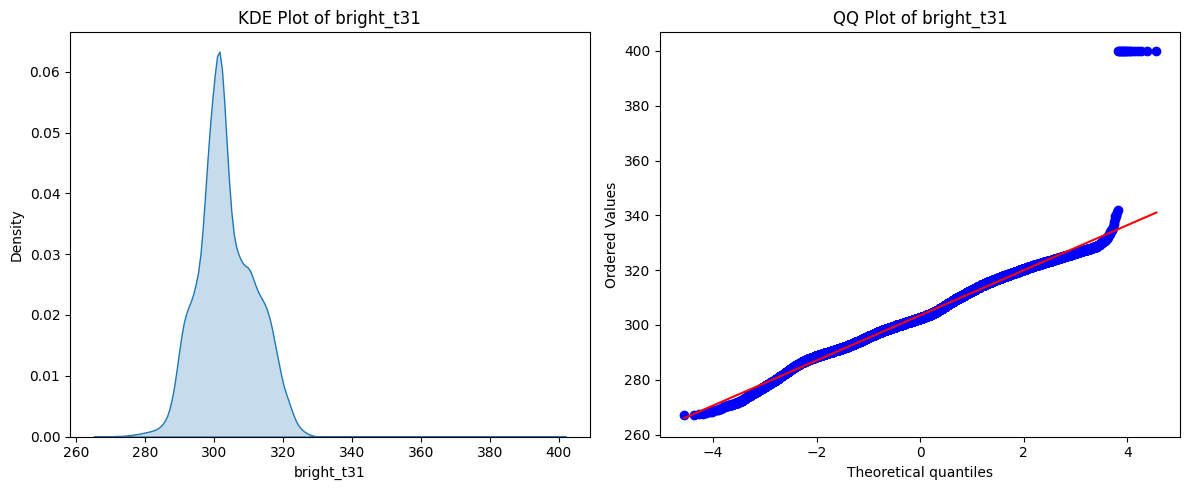

--------------------------------------------------
Analyzing distribution for: scan


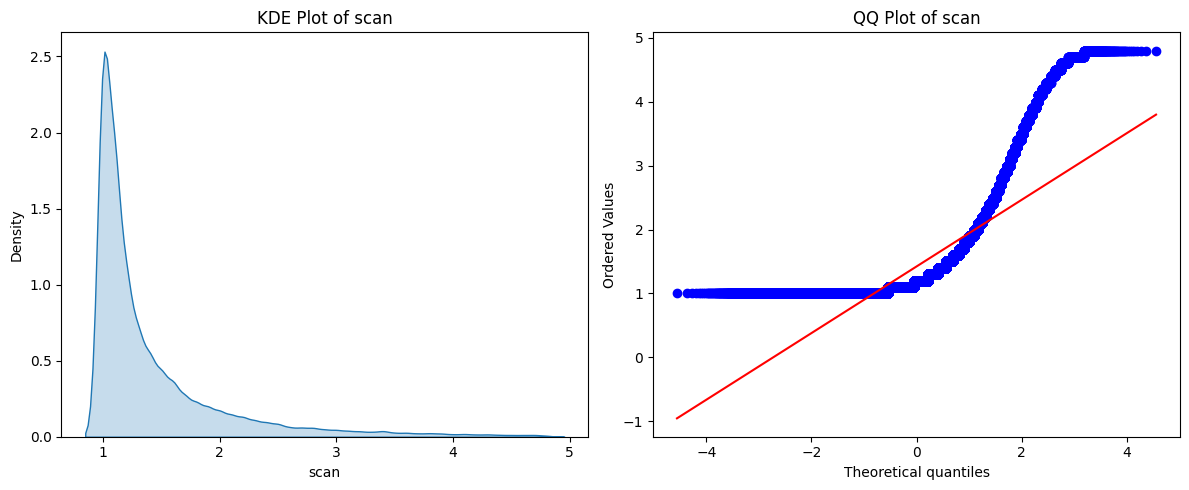

--------------------------------------------------
Analyzing distribution for: track


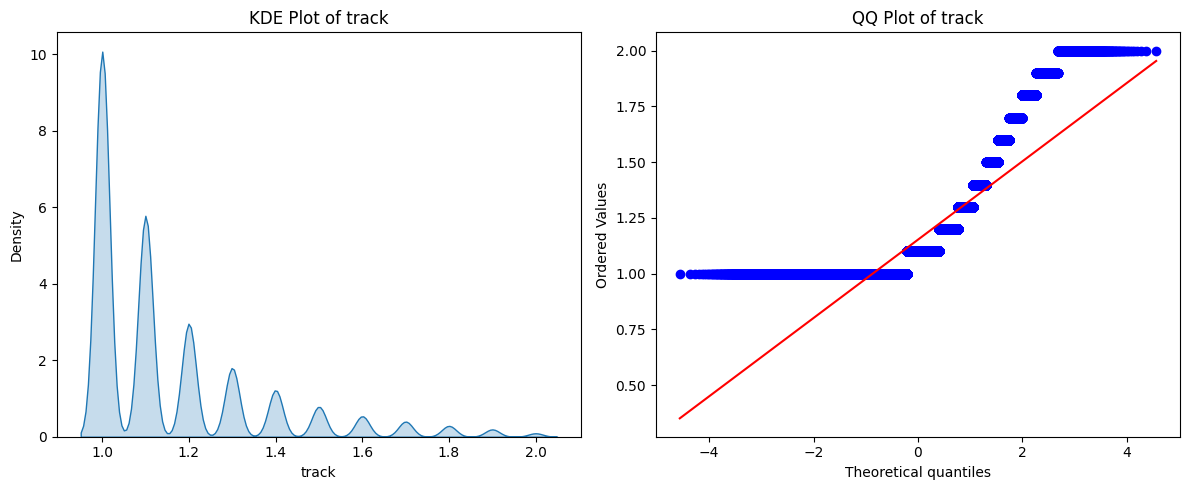

--------------------------------------------------


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# List of numerical features to check for distribution
numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    print(f"Analyzing distribution for: {feature}")

    # KDE Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

    plt.tight_layout()
    plt.show()
    print("-" * 50)

In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

/tmp/ipython-input-31-2672674236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


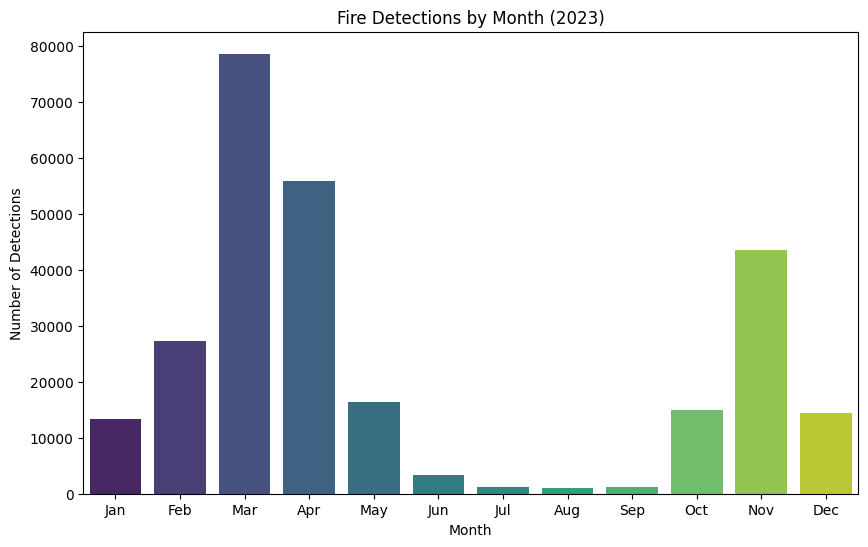

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

/tmp/ipython-input-32-1413927136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='viridis')


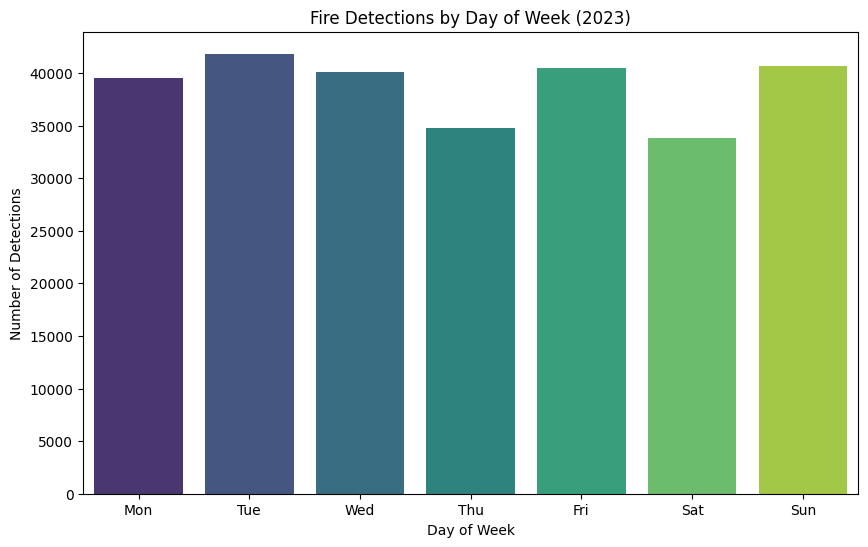

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

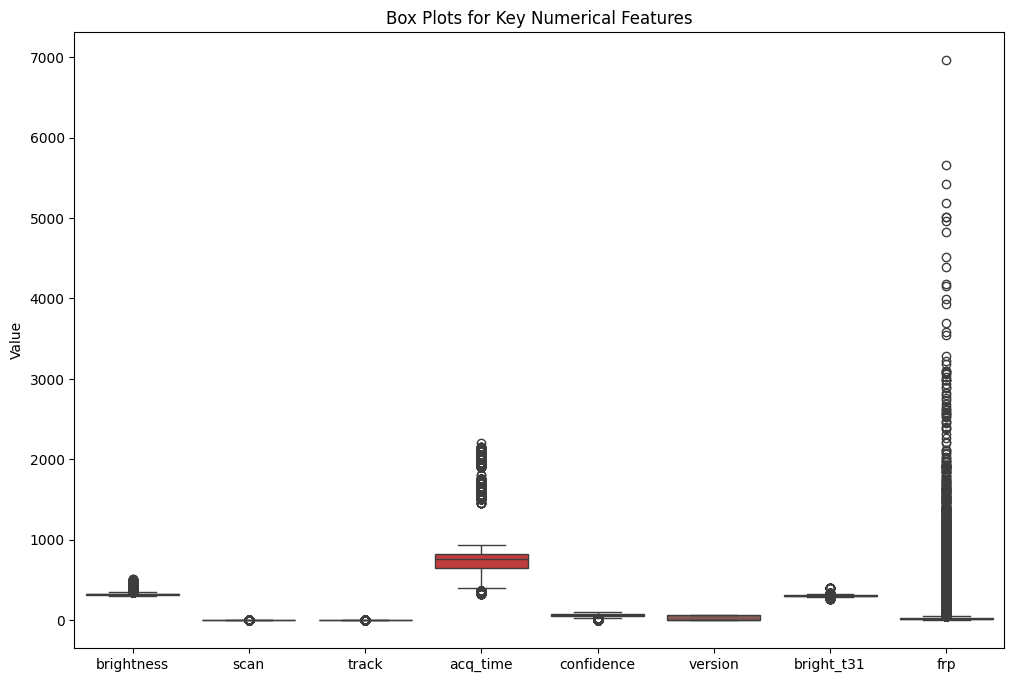

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (189370, 20)


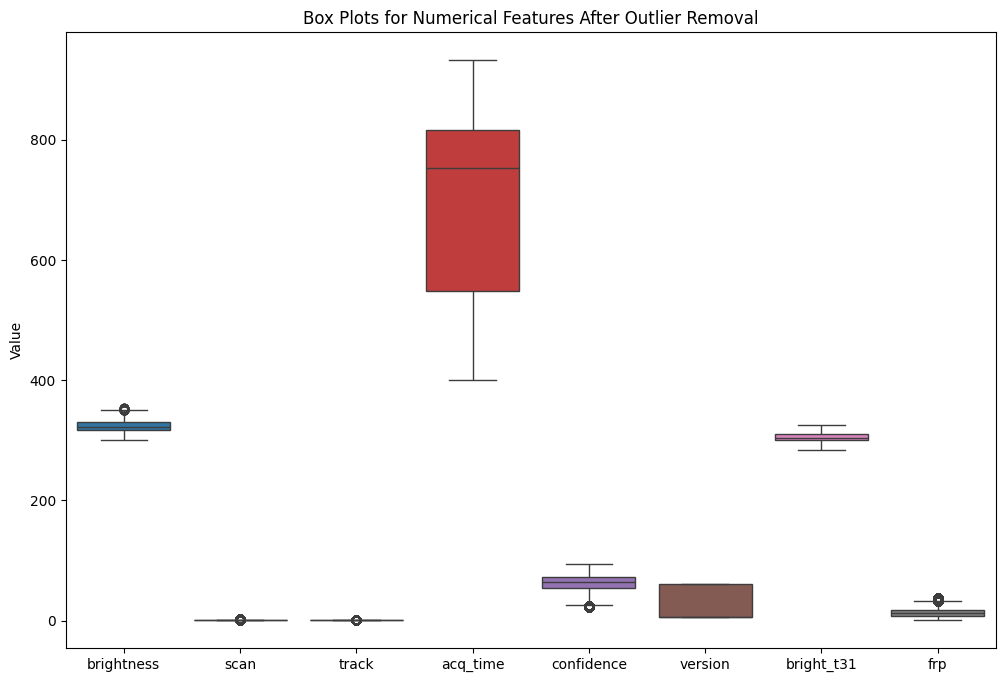

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0,2021,1,4,1,40
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0,2021,1,4,1,54
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0,2021,1,4,1,54
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0,2021,1,4,1,54
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,Terra,MODIS,36,6.03,287.2,5.3,D,0,2021,1,4,1,54


In [ ]:
df.type.value_counts()

,count
type,
0,182841
2,6501
3,28


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

In [ ]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [ ]:
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

In [ ]:
df_encoded.head(100)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,44,6.03,292.6,8.6,0,2021,1,4,1,40,True
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,37,6.03,287.4,9.0,0,2021,1,4,1,54,True
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,46,6.03,287.7,10.7,0,2021,1,4,1,54,True
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,43,6.03,287.6,9.0,0,2021,1,4,1,54,True
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,36,6.03,287.2,5.3,0,2021,1,4,1,54,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,23.7766,86.3997,313.8,1.0,1.0,2021-01-02,454,51,6.03,300.9,6.8,2,2021,1,5,2,45,True
117,23.6829,86.0831,310.4,1.1,1.0,2021-01-02,454,61,6.03,297.3,6.2,2,2021,1,5,2,45,True
118,23.6661,86.9215,308.2,1.0,1.0,2021-01-02,454,50,6.03,297.4,4.8,2,2021,1,5,2,45,True
119,23.8059,86.3222,313.5,1.0,1.0,2021-01-02,454,66,6.03,300.9,8.1,0,2021,1,5,2,45,True


In [ ]:
df_encoded.type.value_counts()

,count
type,
0,182841
2,6501
3,28


In [ ]:
scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,-0.735900,0,2021,1,4,1,40,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,-0.683381,0,2021,1,4,1,54,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,-0.460175,0,2021,1,4,1,54,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,-0.683381,0,2021,1,4,1,54,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,-1.169182,0,2021,1,4,1,54,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189370 entries, 0 to 271207
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   latitude         189370 non-null  float64       
 1   longitude        189370 non-null  float64       
 2   brightness       189370 non-null  float64       
 3   scan             189370 non-null  float64       
 4   track            189370 non-null  float64       
 5   acq_date         189370 non-null  datetime64[ns]
 6   acq_time         189370 non-null  int64         
 7   confidence       189370 non-null  float64       
 8   version          189370 non-null  float64       
 9   bright_t31       189370 non-null  float64       
 10  frp              189370 non-null  float64       
 11  type             189370 non-null  int64         
 12  year             189370 non-null  int32         
 13  month            189370 non-null  int32         
 14  day_of_week      189370 n

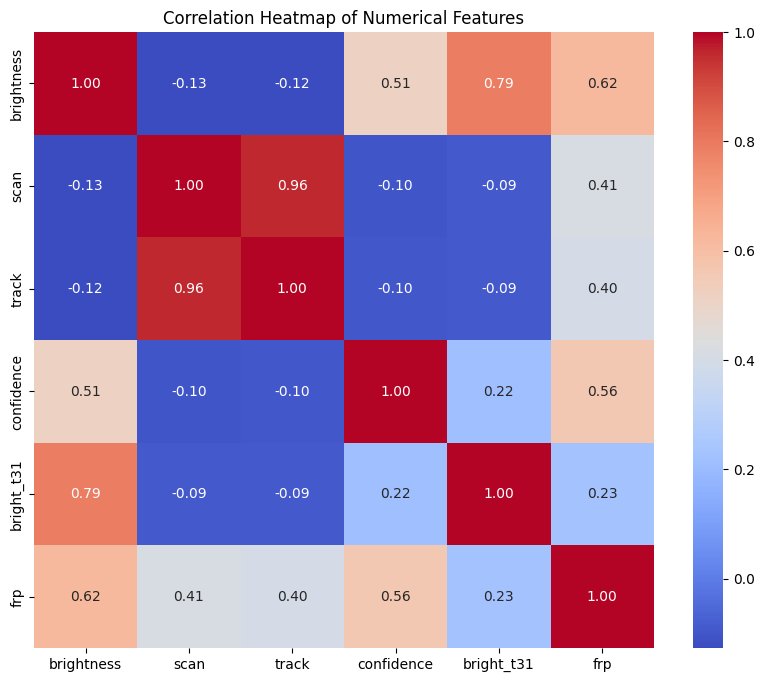

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,-0.735900,0,2021,1,4,1,40,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,-0.683381,0,2021,1,4,1,54,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,-0.460175,0,2021,1,4,1,54,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,-0.683381,0,2021,1,4,1,54,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,-1.169182,0,2021,1,4,1,54,True


In [ ]:
df_encoded.type.value_counts()

,count
type,
0,182841
2,6501
3,28


In [ ]:
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'

X = df_encoded[features]
y = df_encoded[target]


In [ ]:
X

,brightness,scan,track,confidence,bright_t31,frp
0,-2.308455,-0.464860,0.059274,-1.319370,-1.754135,-0.735900
1,-2.445530,0.588678,0.936416,-1.818736,-2.471213,-0.683381
3,-2.422684,0.939857,0.936416,-1.176694,-2.429843,-0.460175
4,-2.548336,0.237499,0.059274,-1.390708,-2.443633,-0.683381
6,-2.594027,-0.816039,-0.817867,-1.890074,-2.498792,-1.169182
...,...,...,...,...,...,...
271199,-0.423680,1.642216,1.813557,-0.605991,0.369517,0.327610
271200,-0.846327,3.398112,2.690698,-1.319370,-0.085551,0.209442
271201,-0.789212,1.993395,1.813557,-1.105356,-0.306191,-0.079412
271204,-0.115262,1.993395,1.813557,0.678093,0.093718,1.679975


In [ ]:
y

,type
0,0
1,0
3,0
4,0
6,0
...,...
271199,0
271200,0
271201,0
271204,0


In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after resampling
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())

Distribution of target variable after SMOTE:
type
0    182841
2    182841
3    182841
Name: count, dtype: int64


In [ ]:
import folium


india_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"FRP: {row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
    ).add_to(india_map)

display(india_map)